In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# 이미지 크기 및 배치 크기 설정
img_height = 180
img_width = 180
batch_size = 32

이미지 폴더 경로는 자신의 경로로 다시 재정의해서 사용하기

# 학습용 데이터셋 로드
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "C:/Users/hongj/ArtificialIntelligence/image_data",  # 이미지 폴더 경로
  validation_split=0.2,  # 20%는 검증용 데이터로 사용
  subset="training",  # 학습용 데이터로 설정
  seed=123,  # 랜덤 시드 고정
  image_size=(img_height, img_width),  # 이미지 크기 조정
  batch_size=batch_size  # 배치 크기 설정
)


In [21]:
# 검증용 데이터셋 로드
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "C:/Users/hongj/ArtificialIntelligence/image_data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)


Found 26 files belonging to 2 classes.
Using 5 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)  # 예시 출력: ['cats', 'dogs']


['cans', 'p_cups']


In [25]:
# 데이터 증강 레이어
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

C:\Users\hongj\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

# 학습 데이터셋 캐시 및 프리페치
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# 검증 데이터셋 프리페치
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


#과대적합을 막기 위해 드롭아웃을 이용

In [41]:
# 모델 정의
model = tf.keras.Sequential([
  data_augmentation,  # 데이터 증강
  layers.Conv2D(32, 3, activation='relu'),  # 첫 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),  # 두 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),  # 세 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Flatten(),  # 2D 데이터를 1D로 변환
  layers.Dense(128, activation='relu'),  # Fully Connected Layer
  layers.Dense(len(class_names), activation='softmax')  # 출력층
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.summary() #모델의 구조

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,941,704 (76.07 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,294,470 (50.71 MB)

In [31]:
# 모델 학습
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 2.3813 - val_accuracy: 0.8000 - val_loss: 872.9469
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9524 - loss: 140.1785 - val_accuracy: 0.8000 - val_loss: 550.2081
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9524 - loss: 89.4386 - val_accuracy: 0.8000 - val_loss: 272.5627
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9524 - loss: 43.6317 - val_accuracy: 0.8000 - val_loss: 107.3047
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9524 - loss: 17.7757 - val_accuracy: 0.8000 - val_loss: 34.8618
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9524 - loss: 5.6436 - val_accuracy: 0.8000 - val_loss: 4.3268
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.9524 - loss: 0.8546 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9524 - loss: 1.4631 - val_accuracy: 1.0

In [33]:
# 검증 정확도 확인
loss, accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8000 - loss: 10.3946
Validation accuracy: 0.800000011920929


In [37]:
# 새로운 이미지 예측
img = image.load_img('C:/Users/hongj/ArtificialIntelligence/검증이미지/찌그러진캔.jpg', target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Predicted class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class: cans


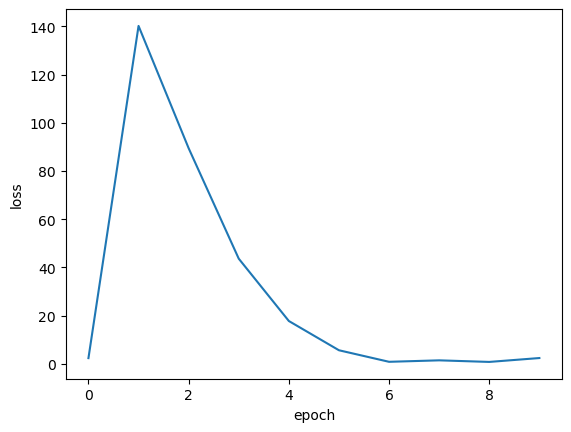

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#손실

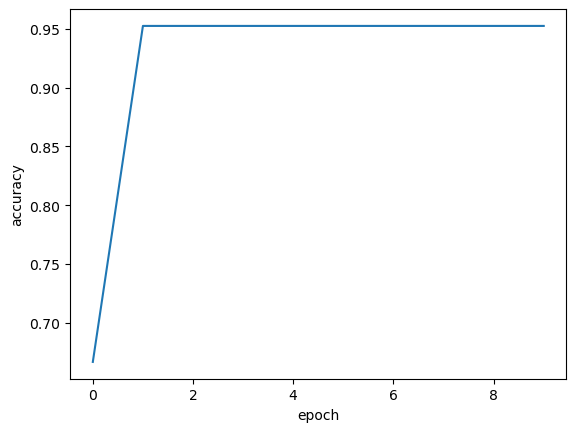

In [51]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [53]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


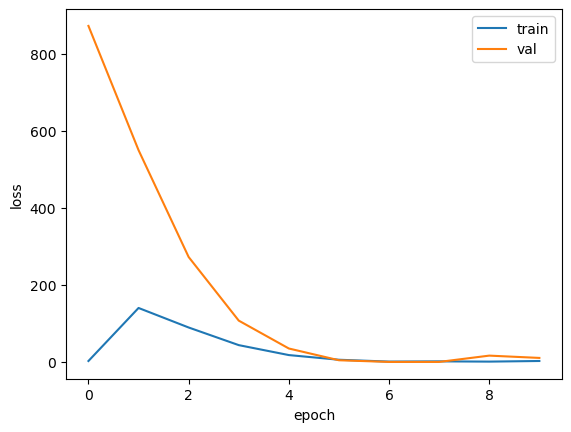

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#손실과 정확도 그래프

same패딩을 적용전

In [124]:
# 모델 정의
model = tf.keras.Sequential([
  data_augmentation,  # 데이터 증강
  layers.Conv2D(32, 3, activation='relu'),  # 첫 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),  # 두 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),  # 세 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Flatten(),  # 2D 데이터를 1D로 변환
  layers.Dense(128, activation='relu'),  # Fully Connected Layer
  layers.Dropout(0.3), #드롭아웃 0%적용
  layers.Dense(len(class_names), activation='softmax')  # 출력층
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [126]:
#조기 종료 콜백

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  
    restore_best_weights=True
)

In [128]:
# 조기 종료를 추가한 모델 학습
history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7619 - loss: 4.1729 - val_accuracy: 0.8000 - val_loss: 652.6294
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.9524 - loss: 110.4783 - val_accuracy: 0.8000 - val_loss: 405.6875
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9524 - loss: 66.2636 - val_accuracy: 0.8000 - val_loss: 170.0186
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.9524 - loss: 26.3218 - val_accuracy: 0.8000 - val_loss: 51.5170
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9524 - loss: 10.2678 - val_accuracy: 1.0000 - val_loss: 3.1993e-05
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.8571 - loss: 2.7210 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9524 - loss: 0.0474 - val_accuracy: 0.8000 - val_loss: 19.5640
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9524 - loss: 3.9324 - val_accura

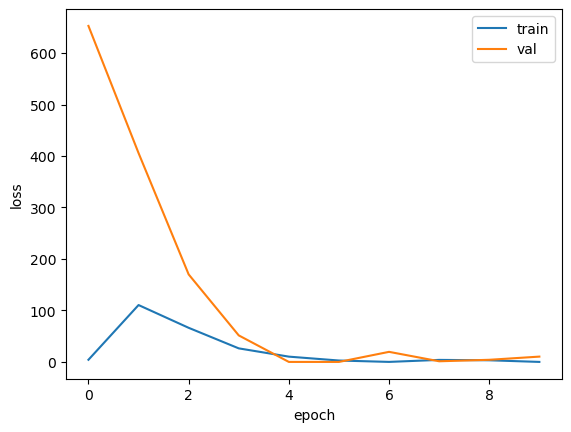

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#same 패딩 적용

In [135]:
# 모델 정의
model = tf.keras.Sequential([
  data_augmentation,  # 데이터 증강
  layers.Conv2D(32, 3, activation='relu', padding='same'),  # 첫 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu',padding='same'),  # 두 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu', padding='same'),  # 세 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Flatten(),  # 2D 데이터를 1D로 변환
  layers.Dense(128, activation='relu'),  # Fully Connected Layer
  layers.Dropout(0.3), #드롭아웃 0%적용
  layers.Dense(len(class_names), activation='softmax')  # 출력층
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  
    restore_best_weights=True
)

In [139]:
history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0476 - loss: 51.9040 - val_accuracy: 0.8000 - val_loss: 999.1797
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.9524 - loss: 147.7651 - val_accuracy: 0.8000 - val_loss: 926.8291
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.9524 - loss: 130.3387 - val_accuracy: 0.8000 - val_loss: 620.0620
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9524 - loss: 99.4664 - val_accuracy: 0.8000 - val_loss: 318.8498
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9524 - loss: 63.3485 - val_accuracy: 0.8000 - val_loss: 108.5797
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9524 - loss: 16.9736 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9524 - loss: 0.0800 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 1.0000 - loss: 0.0000e+00

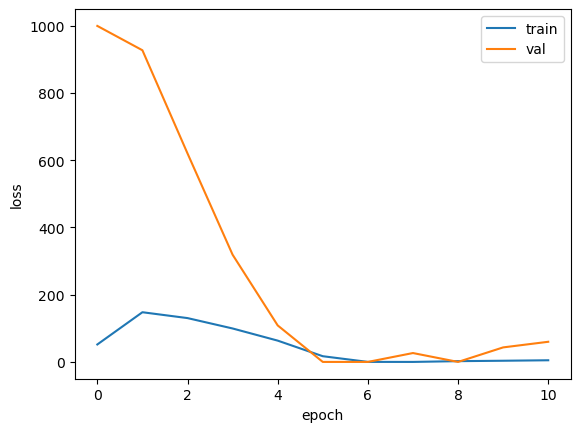

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [143]:
# 검증 정확도 확인
loss, accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation accuracy: 1.0


In [151]:
# 새로운 이미지 예측
img = image.load_img('C:/Users/hongj/ArtificialIntelligence/검증이미지/맥주컵.jpg', target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Predicted class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: cans


In [153]:
#데이터 부족